In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
oils=pd.read_csv('oil.csv')
#oils=oils.set_index('date')

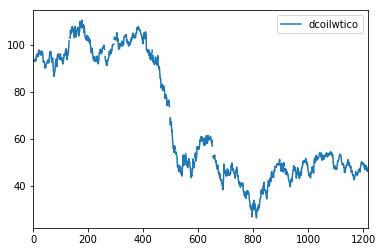

In [196]:
plt.close('all')
oils.plot()
plt.show()

In [3]:
oils=oils.interpolate(method='linear').bfill().ffill()

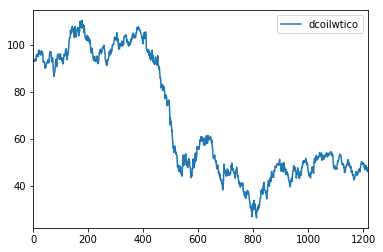

In [198]:
oils.plot()
plt.show()

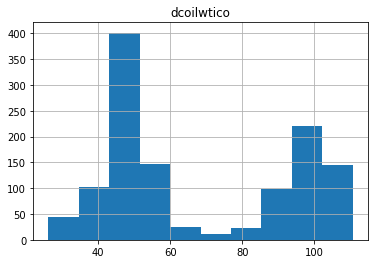

In [199]:
oils.hist()
plt.show()

In [200]:
holidays=pd.read_csv('holidays_events.csv')
holidays=holidays.drop_duplicates(subset=['date'],keep=False)
holidays=holidays.reset_index()
del holidays['index']

In [184]:
holidays[holidays.transferred==True]

,date,type,locale,locale_name,description,transferred
14,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
54,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
109,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
208,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
212,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
214,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
239,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
245,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
252,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
259,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [154]:
stores=pd.read_csv('stores.csv')

In [155]:
items=pd.read_csv('items.csv')

In [156]:
items.family.unique()

array(['GROCERY I', 'CLEANING', 'BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS',
       'PERSONAL CARE', 'LINGERIE', 'BEVERAGES', 'AUTOMOTIVE', 'DAIRY',
       'GROCERY II', 'MEATS', 'FROZEN FOODS', 'HOME APPLIANCES', 'SEAFOOD',
       'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'BEAUTY', 'HARDWARE',
       'LAWN AND GARDEN', 'PRODUCE', 'HOME AND KITCHEN II',
       'HOME AND KITCHEN I', 'MAGAZINES', 'HOME CARE', 'PET SUPPLIES',
       'BABY CARE', 'SCHOOL AND OFFICE SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'CELEBRATION', 'LADIESWEAR', 'BOOKS'], dtype=object)

In [157]:
items.dtypes

item_nbr       int64
family        object
class          int64
perishable     int64
dtype: object

In [158]:
transactions=pd.read_csv('transactions_clean.csv')

In [193]:
# Oil prices on holidays
holidayList=list(holidays['date'])
len(holidayList)
oilPricesH=pd.DataFrame(oils[oils['date'].isin(holidayList)])
oilPricesH=oilPricesH.reset_index()
del oilPricesH['index']
oilPricesH

,date,dcoilwtico
0,2013-01-01,93.140
1,2013-02-11,97.010
2,2013-02-12,97.480
3,2013-04-01,97.100
4,2013-04-12,91.230
5,2013-04-29,94.090
6,2013-05-01,90.740
7,2013-05-24,93.840
8,2013-07-23,107.130
9,2013-07-24,105.410


In [ ]:
# Transactions made on holidays



In [ ]:
# Find the seasonal items sold holiday wise

In [ ]:
# store with highest number of transactions

In [4]:
oils.to_csv('oils_clean.csv', index=False)